# Data: Past, Present, Future |  Lab 4  |  2/14/2018


## describing and predicting: survival curves, smoothing, inventing error, and regression 

## death curves since Halley

(Yes, Halley of the comet.) Quantifying morality goes back to the 17th century with the work of Halley:
![Halley table](https://understandinguncertainty.org/sites/understandinguncertainty.org/files/halley-life-table.jpg)

Today we're going to look at how they were put to work to make money, contempoary with our readings


### Survivor curves and making smoothing "real" at the dawn of the 20th Century

In 1905 a New York Lawyer named Charles Evans Hughes put American corporations on trial: namely, the Big 5 insurances companies at the time had steadily raised salaries of high-ranking employees even as policyholder dividends continued to fall [1]. Hughes was tasked with running a state investigation colloquially known as the "Armstrong investigation" to find out why, and began interviewing some of the very people whose high salaries were being questioned. Particularly sensational to the reading public following this "investigation" was the discovery that insurance actuaries did not use the empirically observed number of deaths, expense account balances, or exact annual interests on investiments [2]. Instead insurance companies <b>calculated "smoothed curves" from data, arguing that such smoothed curves more accurately  described reality</b>. Here early 20th C actuaries were borrowing a page from early 19th C astronomers. For astronomers, the mean position of, say, the position of a star in the sky became its *real* position, even if the mean matched no particular observation, as long as the errors of observation could be assumed to be random. This was a kind of smoothing via least squares [3]. Perhaps this makes sense when observing an object in the sky, but did it make sense to treat errors as deviations: to smooth life expectancies, expense sheets, annual investiment interest and treat these as the "correct" values to calculate risk, make business decisions, and mail annuity payments? Many in life insurance thought it did. In fact, some in insurance saw smoothing as a way not merely to describe society and assign individual risk, but even as a means of improving society by attempting to decrease individual statistical risks, as can be seen in this plot in a book co-authored by Louis Dublin, a vice-president of MET Life Insurance Company in 1931 [4]:

![fig/pg.195.png](pg.195.png)

<small>
[1] For a discussion of the Armstrong Investigation, smoothing, and other details discussed above, see chapter 4 in Dan Bouk's _How Our Days Became Numbered_ (2015).
[2] Bouk, 93. 
[3] Desrosières, _The Politics of Large Numbers_ (2002), chapter 3.
[4] Louis Dublin and Alfred Lotka, _Length of life; a study of the life table_, 191-195. 
</small>

<b> In this lab we're going to try out several forms of smoothing in this lab.</b> To begin, let's construct a life expectancy plot like that above. We'll start with three lists which contains the age of death for three different careers: poets, singers, and writers. (Importantly we haven't told you where we got this data so you should immediately be suspicious of this data!)

In [31]:
poet_death = [24,25,26,28,29,29,29,30,32,33,36,36,37,37,37,37,38,38,39,39,39,39,40,41,42,42,
                 42,42,43,44,44,45,45,45,46,46,46,46,46,47,47,47,48,48,49,49,49,50,50,51,51,51,
                 52,52,52,52,52,53,53,53,54,54,55,55,55,55,56,56,56,56,56,57,57,57,58,58,58,58,
                 59,59,59,59,59,60,60,61,61,62,62,62,62,63,64,64,65,65,65,65,66,66,66,66,67,67,
                 67,67,67,68,68,68,68,68,68,68,68,69,69,69,69,69,69,69,69,70,70,70,70,70,71,71,
                 71,71,71,71,71,71,71,72,72,73,73,73,73,73,73,74,74,74,74,74,74,74,74,74,74,75,
                 75,75,75,75,75,76,76,76,77,77,77,77,78,78,78,78,79,79,79,79,79,79,79,80,80,80,
                 80,81,81,81,81,81,81,81,81,81,82,82,83,83,83,83,83,83,83,83,83,84,84,84,84,85,
                 85,85,85,85,85,85,86,86,86,86,87,87,88,88,88,89,89,89,89,89,89,89,90,90,90,91,
                 91,91,93,93,94,101,107]

singer_death = [21,27,30,33,40,42,43,44,45,46,47,52,53,53,53,54,55,57,60,61,65,69,69,70,72,72,
                75,77,78,78,79,80,81,82,83,84,85,88,89,93,96]

writer_death = [29,30,34,38,39,40,40,42,43,44,48,48,50,51,51,52,52,52,54,55,55,55,56,56,57,57,
                57,57,57,58,60,60,60,60,60,61,61,61,62,62,63,63,63,64,64,64,65,65,65,65,65,65,
                66,66,67,67,67,67,68,68,68,69,69,69,70,70,71,71,71,71,71,71,71,72,72,72,73,73,
                74,74,74,75,75,75,75,76,76,76,76,77,77,77,77,77,78,78,78,79,79,79,80,80,80,80,
                81,81,81,81,82,82,82,82,83,83,84,84,85,86,87,88,88,88,89,89,89,90,90,95,95,96,
                50]

We'll also need to import a few libraries! 

In [32]:
# import pandas library, denoting library as "pd"
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# import a bit of ipython "magic" to get graphs to display in jupyter notebook
%pylab inline           

Populating the interactive namespace from numpy and matplotlib


/Users/wiggins/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Now let's ingest the data into pandas: 

In [33]:
poet_lifespans=pd.DataFrame(poet_death)
singer_lifespans=pd.DataFrame(singer_death)
writer_lifespans=pd.DataFrame(writer_death)

What's the longest living writer, singer, and poet in the dataset?

In [34]:
print("oldest singer: " + str(singer_lifespans.max().item()))
print("oldest poet: " + str(poet_lifespans.max().item()))
print("oldest writer: "+ str(writer_lifespans.max().item()))

oldest singer: 96
oldest poet: 107
oldest writer: 96


What's happening above? Let's consider just the singers:
1. First we select the max value: 
<code>singer_lifespans.max()</code>
2. Then we pull that value out of the data set as a number via the .item(): 
<code>singer_lifespans.max().item()</code>
3. Finally, we wrap the number in a string so to print out the number: 
<code>str(singer_lifespans.max().item())</code>


Likewise, let's now calculate the life expectancy for these three different professions.  

In [35]:
print("singer life expectancy: " + str(singer_lifespans.mean().item()))
print("poet life expectancy: " + str(poet_lifespans.mean().item()))
print("writer life expectancy: " + str(writer_lifespans.mean().item()))

singer life expectancy: 62.951219512195124
poet life expectancy: 66.26141078838174
writer life expectancy: 68.22900763358778


The curve that we saw Dublin and Lotka provide above is often called a survivor curve. Let's compare the survivor curves for poets, singers, and writers. Let's start with poets. 

What we need to generate a list called "poet_survivors_percentages" in which each element of the list is the percentage of the survivors for a given year:

![poet-survivor-list.jpeg](poet-survivor-list.jpeg)


We're going to use a for loop to generate this list. Here is what we need to do: 

For age X, running from age 0 to the oldest poet age: 
1. Grab poets alive at age X, i.e., poet_lifespans[poet_lifespans >= age]. 
    All people younger than age X will return NaN, i.e., NaN = "not a number". 
2. Drop all poets who died at younger age (by dropping all NaN elements), i.e., .dropna().
3. Now count up total number of remaining elements, i.e., .size. Note that this is the number of people still alive. 
4. Divide the number of living poets at age X by total number of poets in sample to get fraction of poets alive at age X. 
5. Add this fraction alive at age X to the list "poet_survivors_percentages".
6. Repeat steps 1 - 5 until age X > oldest poet age. 

We need to do the above steps for each profession too. 

Earlier we noticed that the oldest poet lived to 107 years old so we'll want to be sure our x-axis goes to at least 107. Note that the "current_age" list we generate below contains the specific age for each element of the poet_survivor_precentages list. This will be used as x-axis positions for each (y-axis) life expectancy value for a given age and profession. 

In [36]:
# generate survivorship curves for singers, writers, and poets

poet_survivors = []
poet_survivor_percentages = []
singer_survivors = []
singer_survivor_percentages = []
writer_survivors = []
writer_survivor_percentages = []

current_age = []
total_poets = poet_lifespans.size      # total number of poets in sample
total_singers = singer_lifespans.size  # total number of singers in sample 
total_writers = writer_lifespans.size  # total number of writers in sample

for age in range(0, poet_lifespans.max().item()):
    poet_survivors = poet_survivors + [poet_lifespans[poet_lifespans >= age].dropna().size]
    poet_survivor_percentages = poet_survivor_percentages + [poet_survivors[age]/total_poets]
    
    singer_survivors = singer_survivors + [singer_lifespans[singer_lifespans >= age].dropna().size]
    singer_survivor_percentages = singer_survivor_percentages + [singer_survivors[age]/total_singers]
    
    writer_survivors = writer_survivors + [writer_lifespans[writer_lifespans >= age].dropna().size]
    writer_survivor_percentages = writer_survivor_percentages + [writer_survivors[age]/total_writers]
    
    current_age = current_age + [age]

Now we want to put all these survivor percentages into a pandas dataframe:

In [37]:
survivorship_percentages = pd.DataFrame(
                            {"age": current_age,
                            "poet survivor percentage": poet_survivor_percentages,
                            "singer survivor percentage": singer_survivor_percentages, 
                            "writer survivor percentage": writer_survivor_percentages 
                            })

survivorship_percentages

,age,poet survivor percentage,singer survivor percentage,writer survivor percentage
0,0,1.000000,1.000000,1.000000
1,1,1.000000,1.000000,1.000000
2,2,1.000000,1.000000,1.000000
3,3,1.000000,1.000000,1.000000
4,4,1.000000,1.000000,1.000000
5,5,1.000000,1.000000,1.000000
6,6,1.000000,1.000000,1.000000
7,7,1.000000,1.000000,1.000000
8,8,1.000000,1.000000,1.000000
9,9,1.000000,1.000000,1.000000


Now let's graph these survivor curves for each profession:

Text(0,0.5,'percentage still living')

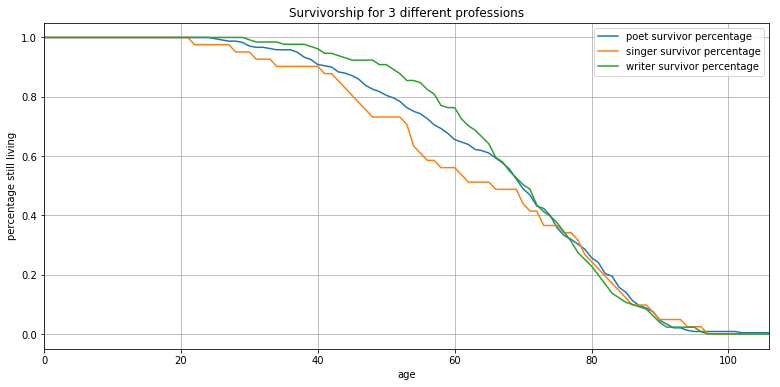

In [38]:
survivorship_percentages.plot(x="age", y=["poet survivor percentage", "singer survivor percentage", 
                              "writer survivor percentage"], figsize=[13,6],
                              title="Survivorship for 3 different professions", grid =True)
plt.ylabel('percentage still living')

The above is the same survivor graph as Dublin and Lotka provided above. <b>What information does this graph propose to present?</b> If we choose to use the above graph to predict the future rather than to merely describe the past, which profession (or professions) should you choose to maximize your life (assuming your only 3 options are between being a singer, poet, or writer)? What are the (many) problems with trying to predict the future with this graph?

#### Fun Aside about measuring life expectancy from different ages

Before turning our attention to smoothing these survival curves, lets also note an interesting detail about life expectancy. Usually when we state life expectancy for a country, we are measuring "life expectancy" from birth---but as you get older, your life expectancy also increases. Why? Those people that die earlier don't get included in subsequent "life expectancy" calculations: in effect, the older you get, the more likely you are to live longer. Let's plot this to get more practice using pandas to graph stuff. Basically, to get life expectancy for different ages, we re calculate the mean lifespan, after discarding those lives that died before the age we are examining. For example, to calculate the life expectancy for those aged 20, we find the life expectancy for everyone aged 20 and older but do not include those who died before age 20. It's not to difficult to calculate the life expectancy for each profession for all ages if we just slightly alter the code above that we developed for survival curves. 

Text(0,0.5,'life expectancy')

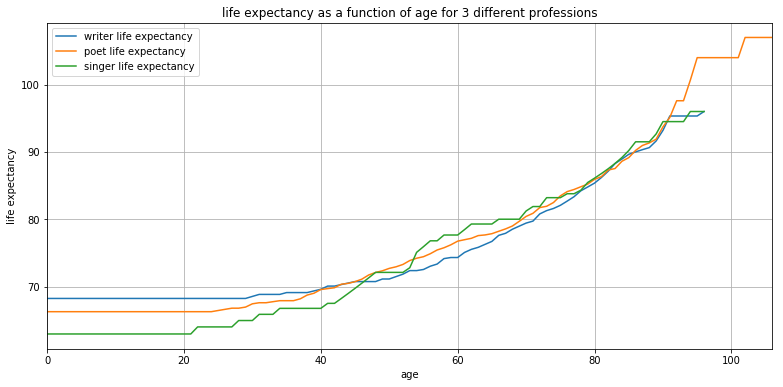

In [39]:
# calculating mean life expectancy at different ages
# note 1. We use poet lifespan max to keep columns all the same size for graphing
# note 2. We separate our for loops for each profession to make it easier to follow 


poet_life_expectancy = []
current_age = []

# calulate poet life expectancy for each age
for age in range(0, poet_lifespans.max().item()):
    poet_life_expectancy = poet_life_expectancy + [poet_lifespans[poet_lifespans >= age].mean().item()]
    current_age = current_age + [age] # we will use this list for x values in plot
    
# calculate singer life expectancy for each age 
singer_life_expectancy = []
for age in range(0, poet_lifespans.max().item()):
    singer_life_expectancy = singer_life_expectancy + [singer_lifespans[singer_lifespans >= age].mean().item()]   

# calculate writer life expectancy for each age
writer_life_expectancy = []
for age in range(0, poet_lifespans.max().item()):
    writer_life_expectancy = writer_life_expectancy + [writer_lifespans[writer_lifespans >= age].mean().item()]       
   
# feed all 4 of these lists into a pandas dataframe for easy graphing
life_expectancy_at_different_ages = pd.DataFrame(
        {"age": current_age,
         "writer life expectancy": writer_life_expectancy,
         "poet life expectancy": poet_life_expectancy,
         "singer life expectancy": singer_life_expectancy
        })

# graph the life expectancy for each profession for each age
life_expectancy_at_different_ages.plot(x="age", y=["writer life expectancy", "poet life expectancy",
                                       "singer life expectancy"], figsize=[13,6], title= 
                                       "life expectancy as a function of age for 3 different professions", 
                                      grid=True)
plt.ylabel('life expectancy')


So the older you are, the greater your total life expectancy will be. However, there's something strange going on with the poets. It appears that if you manage to live till about 95 or so, your life expectancy won't increase again until you hit 101 or so. What's going on here? What can we infer about the data and how can we check this? 

<b> Now let's return to survivor curves and smoothing. </b> Recall the following plot from above, and pay special attention to what's happening to the singers.

Text(0,0.5,'percentage still living')

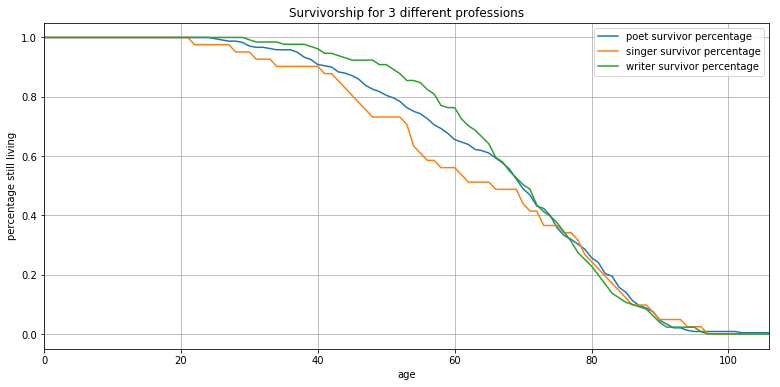

In [40]:
survivorship_percentages.plot(x="age", y=["poet survivor percentage", "singer survivor percentage", 
                              "writer survivor percentage"], figsize=[13,6],
                              title="Survivorship for 3 different professions", grid =True)
plt.ylabel('percentage still living')
#ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)

Note how from approximately ages 22 to 75, the graph suggests you're more likely to die if you're a singer, but if you make it to your early 90s you're more likely to be alive than either poets or writers. What's going on here?

In [41]:
# HINT
print(poet_lifespans.size)
print(singer_lifespans.size)
print(writer_lifespans.size)

241
41
131


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a12dbeb00>]], dtype=object)

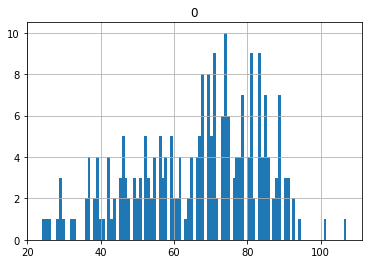

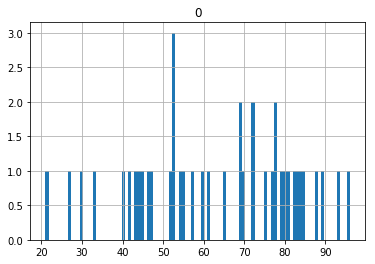

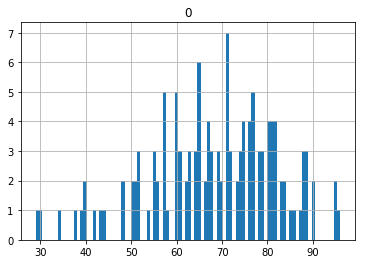

In [42]:
# ANOTHER HINT
poet_lifespans.hist(bins=poet_lifespans.max().item())
singer_lifespans.hist(bins=singer_lifespans.max().item())
writer_lifespans.hist(bins=writer_lifespans.max().item())

When actuaries at the outset of the 20th C turned to smoothing, they did so in part out of a practical necessity of having highly variable data. Yet this was not the only reason. Just as bankers in the 1830s turned to smoothing to hide the extreme daily and weekly variation so as to prevent a bank run, so too did actuaries make use of smoothing to emphasize regularity rather than chance [4]. 


<small>[4] Bouk, _How Our Days Became Numbered_ (2015), 94-95, 100-101.</small>

Let's try our hand at smoothing our survival curves. First we have to average together sets of lifespans for each profession. Let's average 3 deaths at a time. 

In [43]:
# SMOOTH POET DEATHS
smoothed_poet_death = []
for set_of_3 in range(0, len(poet_death), 3): 
    if set_of_3 not in {237, 240}:
        smoothed_poet_death = smoothed_poet_death + [(poet_death[set_of_3]
                                                      + poet_death[set_of_3+1]
                                                      + poet_death[set_of_3+2]
                                                     )/3]  
    elif set_of_3 == 237:
        # Here we avg 4 instead of 3 death ages
        smoothed_poet_death = smoothed_poet_death + [(poet_death[set_of_3]
                                                      + poet_death[set_of_3+1]
                                                      + poet_death[set_of_3+2]
                                                      + poet_death[set_of_3+3]
                                                     )/4]  

# SMOOTH SINGER DEATHS
smoothed_singer_death = []
for set_of_3 in range(0, len(singer_death), 3):
    if set_of_3 not in {39}:
        smoothed_singer_death = smoothed_singer_death + [(singer_death[set_of_3]
                                                          + singer_death[set_of_3+1]
                                                          + singer_death[set_of_3+2]
                                                         )/3] 
    elif set_of_3 == 39:
        # Here we avg 2 instead of 3 death ages
        smoothed_singer_death = smoothed_singer_death + [(singer_death[set_of_3]
                                                          + singer_death[set_of_3+1]
                                                         )/2] 

        
        
# SMOOTH WRITER DEATHS
smoothed_writer_death = []
for set_of_3 in range(0, len(writer_death), 3): 
    if set_of_3 not in {129}:
        smoothed_writer_death = smoothed_writer_death + [(writer_death[set_of_3]
                                                          + writer_death[set_of_3+1]
                                                          + writer_death[set_of_3+2]
                                                         )/3]  
    elif set_of_3 == 126:
        # Here we avg 5 instead of 3 death ages
        smoothed_writer_death = smoothed_writer_death + [(writer_death[set_of_3]
                                                          +writer_death[set_of_3+1]
                                                          +writer_death[set_of_3+2]
                                                          +writer_death[set_of_3+3]
                                                          +writer_death[set_of_3+4]
                                                         )/5]  


Now that we have the smoothed data, we how does our calculated life expectancy change?

In [44]:
s_poet_lifespans=pd.DataFrame(smoothed_poet_death)
s_singer_lifespans=pd.DataFrame(smoothed_singer_death)
s_writer_lifespans=pd.DataFrame(smoothed_writer_death)

print("singer life expectancy: " + str(singer_lifespans.mean().item()))
print("poet life expectancy: " + str(poet_lifespans.mean().item()))
print("writer life expectancy: " + str(writer_lifespans.mean().item()))

print("smoothed singer life expectancy: " + str(s_singer_lifespans.mean().item()))
print("smoothed poet life expectancy: " + str(s_poet_lifespans.mean().item()))
print("smoothed writer life expectancy: " + str(s_writer_lifespans.mean().item()))

singer life expectancy: 62.951219512195124
poet life expectancy: 66.26141078838174
writer life expectancy: 68.22900763358778
smoothed singer life expectancy: 63.702380952380956
smoothed poet life expectancy: 66.12604166666668
smoothed writer life expectancy: 68.15503875968994


So smoothing doesn't make too big of difference with our data averages. Let's compare our smoothed survivor curves to our original survivor curves. We do the same thing as we did before, but add "s" to denote we're now working with smoothed data.

In [45]:
# generate survivorship curves for singers, writers, and poets using *smoothed data*

s_poet_survivors = []
s_poet_survivor_percentages = []
s_singer_survivors = []
s_singer_survivor_percentages = []
s_writer_survivors = []
s_writer_survivor_percentages = []

s_total_poets = s_poet_lifespans.size      # total number of avg data in poets sample
s_total_singers = s_singer_lifespans.size  # total number of avg data in singers sample 
s_total_writers = s_writer_lifespans.size  # total number of avg data in writers sample

for age in range(0, poet_lifespans.max().item()):
    s_poet_survivors = s_poet_survivors + [s_poet_lifespans[s_poet_lifespans >= age].dropna().size]   
    s_poet_survivor_percentages = s_poet_survivor_percentages + [s_poet_survivors[age]/s_total_poets]
    
    s_singer_survivors = s_singer_survivors + [s_singer_lifespans[s_singer_lifespans >= age].dropna().size]
    s_singer_survivor_percentages = s_singer_survivor_percentages + [s_singer_survivors[age]/s_total_singers]
    
    s_writer_survivors = s_writer_survivors + [s_writer_lifespans[s_writer_lifespans >= age].dropna().size]
    s_writer_survivor_percentages = s_writer_survivor_percentages + [s_writer_survivors[age]/s_total_writers]

In [46]:
survivorship_percentages_smoothed = pd.DataFrame(
                            {"age": current_age,
                            "poet survivor %": poet_survivor_percentages,
                            "singer survivor %": singer_survivor_percentages, 
                            "writer survivor %": writer_survivor_percentages,
                            "poet survivor % (smoothed)": s_poet_survivor_percentages,
                            "singer survivor % (smoothed)": s_singer_survivor_percentages, 
                            "writer survivor % (smoothed)": s_writer_survivor_percentages,
                            })

survivorship_percentages_smoothed

,age,poet survivor %,poet survivor % (smoothed),singer survivor %,singer survivor % (smoothed),writer survivor %,writer survivor % (smoothed)
0,0,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
1,1,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
2,2,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
3,3,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
4,4,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
5,5,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
6,6,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
7,7,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
8,8,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
9,9,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000


Now let's compare our smoothed curves with our original curves! (Note we make these graphs a little bigger to facilitate visual inspection.) 

Text(0,0.5,'percentage still living')

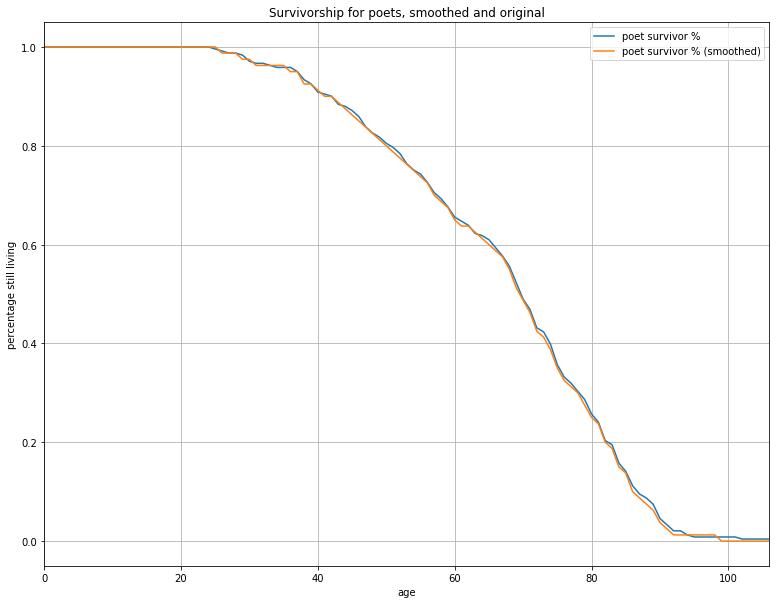

In [47]:
survivorship_percentages_smoothed.plot(x="age", y=["poet survivor %", "poet survivor % (smoothed)"], 
                                       figsize=[13,10], title="Survivorship for poets, smoothed and original", 
                                       grid =True)
plt.ylabel('percentage still living')

Text(0,0.5,'percentage still living')

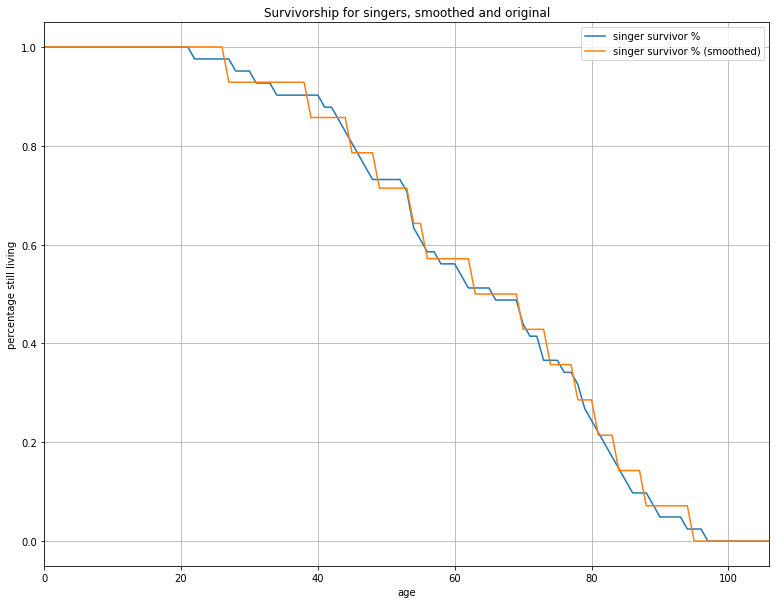

In [48]:
survivorship_percentages_smoothed.plot(x="age",  y=["singer survivor %", "singer survivor % (smoothed)"], 
                                       figsize=[13,10], title="Survivorship for singers, smoothed and original", 
                                       grid =True)
plt.ylabel('percentage still living')

Text(0,0.5,'percentage still living')

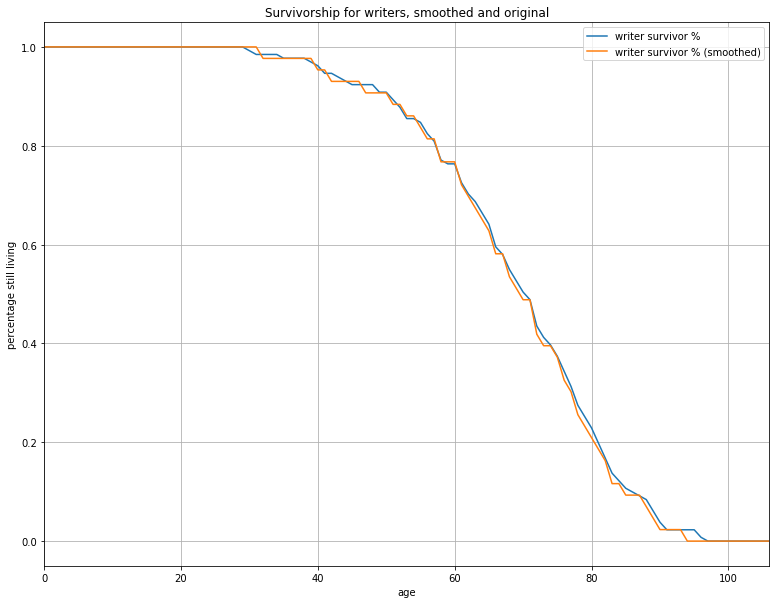

In [49]:
survivorship_percentages_smoothed.plot(x="age",  y=["writer survivor %", "writer survivor % (smoothed)"], 
                                       figsize=[13,10], title="Survivorship for writers, smoothed and original", 
                                       grid =True)
plt.ylabel('percentage still living')

It's not clear from visual inspection that survivor curve for the smoothed poets' data is much smoother than our original data. Ditto for our writers. And the survivor curve for our singers became *less* smooth, not more. <b>What's going on here?</b> (HINT: There's no error in the code...) 

# Intermission ------

## Recall the "double role" of statistics in Politics:
1. <b>construction of statistical entities</b>: "stable objects" can be measured and used as forms of evidence and certainty (e.g., the GDP, unemployment, life expectation, citation indexs, etc.)
2. <b>explication and analysis of relationships between entities</b>: what are the relationships between objects and how does changing one influence others? 

<small>(See, for instance, Desrosieres, _The Politics of Large Numbers_ (1998), 61.)</small>

#### To better understand how statistical entities' "double role" in being used to make an argument, let's look at linear regression. But we first need to understand the innovations that made it thinkable to model error. 

# Inventing Error -----

Let's say you want to determine the position of a star in the sky. You have bunch of observations of the sky you produced here just outside of New York. You also have a bunch of observations taken in Hawaii. Today we'd just combine the observations, assuming that the distribution of the error is a gaussian. Imagine we are measuring the position of a star *in only 1-dimension*, i.e., we are measuring a star only along the x-axis.
![star_obs](Star.obs.jpeg)
<small>(Note that this is an example of an "objective mean" we discussed in class.)</small>


#### However, it requires an argument to assume error would be distributed in this way! 
It wasn't obvious that error would be normally distributed at the start of the 19th century! In the 18th century they tried to deal with questions of modeling error either (1) by averaging observations (as we did above with smoothing) to reduce the number of equations or (2) to minimize the sum of the absolute values of the residuals. <b> In 1805 Legendre gave the "method of least squares"</b> in which we have the following situation:
![Residuals!](Residuals.jpeg)
where each residual, $r_i$, can be written as

$ r_i = y_i - y(x_i, \beta_i)$

which is the distance between the $i^{th}$ observation $y_i$. The "best fit line" is $y = \beta_0 + \beta_1(x)$, denoted in blue above, and satisfies the following "least squares" condition:

$min \sum{r_i} = min \sum_{i = 1}^{i}{(y_i-y(x_i,\beta_i))^2}$

--that is, the line minimizes the square of the residuals.  

The least squares method was the solution to an empirical problem <b>as long as the error could be assumed to be randomly produced</b>, but in 1810 Laplace realized that any distribution of errors (i.e., residuals) would produce a gaussian. What did he "discover" to justify this? 

<b>The Central Limit Theorem:</b> 
0. Start with *any* distribution, known or unknown. 
1. Take $N$ samples of $X$ observations.
2. Take the mean of $X$ observations for each sample.
3. Plot the means of the samples.
4. The histogram of the sample of the means will <b>tend toward a gaussian as $N \rightarrow \infty $

...*that is, regardless of the distribution of your residuals, the means of $N$ samples of $X$ observations will always produce a gaussian distribution when one takes enough samples!*

Lets verify this for ourselves! 


In [50]:
from numpy.random import beta
from scipy.stats import beta as scipy_beta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generates S samples of N randomly sampled variables
def samples_from_beta(num_of_samples, sample_size):
    samples = beta(.5, .5, [num_of_samples, sample_size]) #NOTE THIS DISTRIBUTION IS NOT A GAUSSIAN
    return samples

def means_of_samples(samples_from_beta, num_of_samples, sample_size):
    means = []
    for sample in range(num_of_samples):
        means.extend([samples_from_beta[sample].mean()])
    means = np.array(means)    
    return means

def gaussian_curve_overlay(data, x):
    sigma = data.std()
    mu = data.mean()
    plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r') 
    return

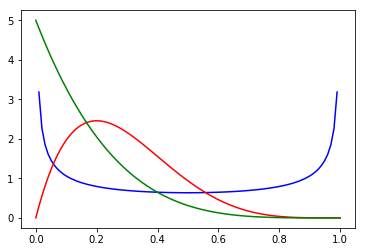

In [51]:
## A beta distribution is nothing like a gaussian!
## Here we plot out three beta distributions (with different alphas & betas) to show you
## what a beta distribution is and to convince you it is 
## nothing like a gaussian

## Historical Aside: Karl Pearson made the beta distribution well-known to statistics.


## Pick different $\alphas$ and $\betas$ for beta distribution
#a, b = 1.0, 5.0   # pdf centered on left side
#a, b = 2.0 5.0    # pdf skewed to left, with large right "wing"
#a, b = 0.5, 0.5    # pdf nothing like a gaussian

#plot beta for a, b = 0.5, 0.5 
a, b = 0.5, 0.5    # pdf nothing like a gaussian
x = np.linspace(scipy_beta.ppf(0.0, a, b), scipy_beta.ppf(1.0, a, b), 100)
f = scipy_beta(a, b)
plt.plot(x, f.pdf(x), color = "blue")

#plot beta for a, b = 2.0 5.0
a, b = 2.0, 5.0    # pdf skewed to left, with large right "wing"
x = np.linspace(scipy_beta.ppf(0.0, a, b), scipy_beta.ppf(1.0, a, b), 100)
f = scipy_beta(a, b)
plt.plot(x, f.pdf(x), color = "red")

#plot beta for a, b = 1.0, 5.0
a, b = 1.0, 5.0    # pdf skewed to left, with large right "wing"
x = np.linspace(scipy_beta.ppf(0.0, a, b), scipy_beta.ppf(1.0, a, b), 100)
f = scipy_beta(a, b)
plt.plot(x, f.pdf(x), color ="green")
plt.show()


For our purposes, lets use $\alpha = \beta = .5$ for our beta distribution (i.e., the blue curve above) since this looks the least like a gaussian. 

Now lets examine a few plots so see how producing a historgram of the mean of more and more samples eventually converges to a gaussian distribution. 

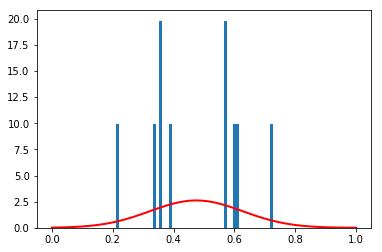

In [52]:
# For 10 samples...

x = np.linspace(0, 1, 100)
num_of_samples = 10
num_of_random_vars = 10
data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

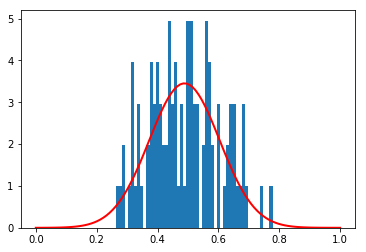

In [53]:
# For 100 samples...
x = np.linspace(0, 1, 100)
num_of_samples = 100
num_of_random_vars = 10
data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

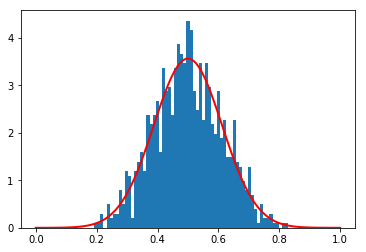

In [54]:
#For 1000 samples...

x = np.linspace(0, 1, 100)
num_of_samples = 1000
num_of_random_vars = 10
data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

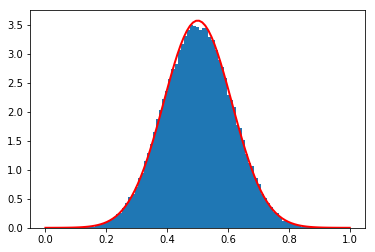

In [55]:
# For 100000 samples...
x = np.linspace(0, 1, 100)
num_of_samples = 100000
num_of_random_vars = 10
data = means_of_samples(samples_from_beta(num_of_samples, num_of_random_vars), \
                        num_of_samples, num_of_random_vars)
plt.hist(data, x, normed=True)
gaussian_curve_overlay(data, x)
plt.show()

#### That looks very close to a gaussian even thought the distribution we sampled from (i.e., a beta distribution) looks nothing like a gaussian! 
 Laplace saw this and realized that Gauss' "least squares approach" could handle residual error regardless of how that error was distributed. This was an important *theoretical* argument for modeling error as a gaussian--now called the Lapace-Gaussian synthesis--and it's why so many people rush to *assume* error is gaussian, or even rush to use a gaussian for social activities unrelated to error. (In any case, note that social data rarely has  error that is random...)  

It took nearly a century to build off of the Gauss-Laplace synthesis, largely because of the interpretative challenge of equating objective and subjective means as interchangable  (something that happened with Pearson, Galton, and others at then end of the 19th century).

## Least Squares and Regression
Let's take a look at our residuals graph from earlier. 
![Residuals!](Residuals.jpeg)
Today we tend to see a plot like this in the context of linear regression. The task of linear regression is just to find the blue line for a particular set of data, via the method of least squares discussed above. Thanks to python, it's very, very easy to do simple linear regression using least squares.  

Linear Regression IN GENERAL:

$y = \beta_n x_n + ... + \beta_1 x_1 + \mu_0$

Linear Regression FOR JUST ONE VARIABLE:

$y = \beta_1 x_1 + \mu$ 

where $\beta_1$ is the slope, $x$ are the observations, and $\mu$ is the y-intercept.  

[-1.27925216  3.21176162  1.62204336  1.5488715   0.67473231 -0.45526104
  1.95741333  0.93671932 -0.90719471 -1.86938467  0.13448846 -1.72976942
 -1.14743472 -0.79009423 -1.18777064  2.24924542 -0.06831069 -1.44953056
  0.34289259  2.88921778  0.462605   -0.27691952  4.80007891 -3.98980513
  0.07854184  3.36850091  4.32688612 -0.45414592 -0.970509   -1.23556691] [ -0.40931713  -2.15137153   3.01173108   5.52210201  -4.14589369
  -4.21137243   0.35377189   1.01275948  -0.81413301   1.73867972
   1.64889555  -3.54415472  10.04739332   7.08452768   8.01835043
   0.76785831   1.73944126   5.48988854   4.52125079   3.98100814
  -1.40582536   7.31354452   5.00362421   8.03236268  -0.85151302
  -2.31006404   6.70876512  -3.26275933   3.59364126   3.2989624 ]


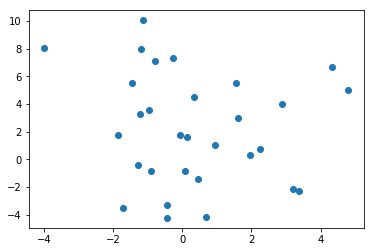

In [56]:
# Let's begin by generating and plotting "simulated" data
from numpy.random import normal
mu, sigma = 0, 2.0
random_x = normal(mu, sigma, 30)
random_y = normal(2, 3, 30)

#output actual list of data
print(random_x, random_y)

#plot data
plt.scatter(random_x, random_y)
plt.show()

,x,y
0,-1.279252,-0.409317
1,3.211762,-2.151372
2,1.622043,3.011731
3,1.548871,5.522102
4,0.674732,-4.145894
5,-0.455261,-4.211372
6,1.957413,0.353772
7,0.936719,1.012759
8,-0.907195,-0.814133
9,-1.869385,1.738680


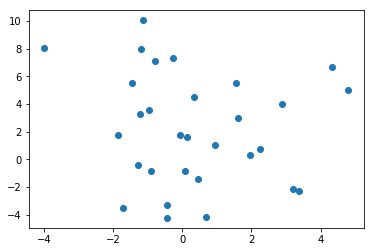

In [57]:
## As we did above, we can put this data into pandas, allowing us to reference
## this data via column name

d = {'x' : pd.Series(random_x),  'y' : pd.Series(random_y)}
dat = pd.DataFrame(d)

#plot data
plt.scatter(dat["x"], dat["y"])

#output dataframe
dat

As promised, it's almost too easy to do linear regression:

In [58]:
import statsmodels.formula.api as sm
sm_lm = sm.ols(data = dat, formula = "y ~ x").fit()

print(sm_lm.summary())
print("----")
print(sm_lm.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.3921
Date:                Tue, 12 Feb 2019   Prob (F-statistic):              0.536
Time:                        09:27:04   Log-Likelihood:                -83.670
No. Observations:                  30   AIC:                             171.3
Df Residuals:                      28   BIC:                             174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2777      0.756      3.013      0.0

Thus we get:
    
$y = (x.coefficient)*x + intercept$

which you can easily plot:

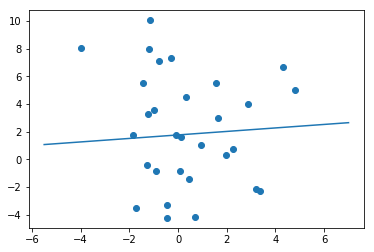

In [59]:
#from above, look up the following two coefficients and input their values below:
# YOU MUST CHANGE THESE VALUES EACH TIME YOU GENERATE NEW DATA
x_coefficient = 0.126485 # MUST CHANGE TO MATCH x-coefficient above
intercept = 1.772521     # MUST CHANGE TO MATCH y-intercept above

plt.scatter(dat["x"], dat["y"])
x = np.linspace(-5.5, 7, 100)
plt.plot(x,x_coefficient*x + intercept)
plt.show()

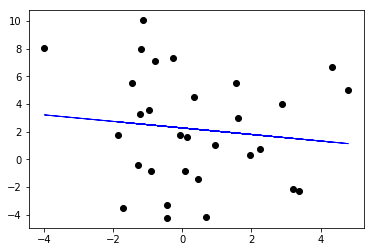

In [60]:
# We can do the same thing in scikit-learn and its faster and therefore more useful when handling slightly bigger data sets
# IN THIS CASE, SKLEARN PLOTS LINE AUTOMATICALLY

from sklearn import linear_model

dat_array = np.asarray(dat)
skl_lm = linear_model.LinearRegression()
x = dat.x.values
x = x.reshape(len(x), 1) #note that scikit-learn requires an input-matrix of a particular shape...

# now we do the above two operations for y in one line...
y = (dat.y.values).reshape(len(dat.y.values), 1)

# generate model
skl_lm.fit(x, y)

# plot fit line
plt.scatter(x, y,  color='black')
plt.plot(x, skl_lm.predict(x), color='blue', linewidth=1)
plt.show()